In [1]:
train_path = "train.txt"
test_path = "test.txt"
val_path = "val.txt"

## emotion labels
label2int = {
  "sadness": 0,
  "joy": 1,
  "love": 2,
  "anger": 3,
  "fear": 4,
  "surprise": 5
}

emotions = [ "sadness", "joy", "love", "anger", "fear", "surprise"]

In [17]:
import pandas as pd

import pickle

# helper function
def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))


In [20]:
import pandas as pd
#load the dataset
# Path to the file (adjust if needed)
file_path = "/content/merged_training.pkl"

# Load the DataFrame
df = pd.read_pickle(file_path)

# Preview the data
print(df.head())
print(df.columns)


                                                     text emotions
27383   i feel awful about it too because it s my job ...  sadness
110083                              im alone i feel awful  sadness
140764  ive probably mentioned this before but i reall...      joy
100071           i was feeling a little low few days back  sadness
2837    i beleive that i am much more sensitive to oth...     love
Index(['text', 'emotions'], dtype='object')


In [22]:
# 2. Check and clean column names if needed
print("Available columns:", df.columns)
df.columns = df.columns.str.strip()

Available columns: Index(['text', 'emotions'], dtype='object')


In [23]:
# 3. Extract features and labels
X = df['text']
y = df['emotions'].str.strip()

In [25]:
from sklearn.model_selection import train_test_split
# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 5. Convert text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
# 6. Train the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [29]:
# 7. Making predictions
y_pred = model.predict(X_test_vec)

In [30]:
# 8. Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")


✅ Accuracy: 0.8462


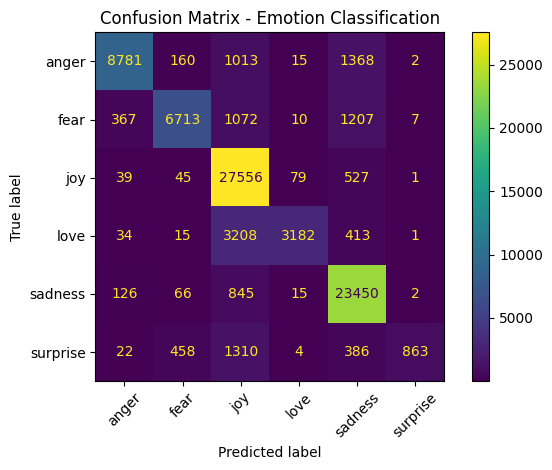

In [31]:
# 9. Displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - Emotion Classification")
plt.tight_layout()
plt.show()